In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [42]:
# generator with fixed seed
rng = np.random.default_rng(423)

# Gaussian downsampling test

Simulating expression data and downsampling using a binomial capture efficiency effect appears to have a different impact on correlations depending on whether the capture efficiency is sampled (per cell) or fixed to a constant value

Attempt to replicate this with correlated gaussian data:
- sample n pairs of values from a 2D multivariate gaussian
- use correlation test to estimate the correlation between the 2 samples of n values (separate the pairs)
- downsample the values using fixed / sampled capture efficiency
- use correlation test to estimate the new correlation
- repeat many times
- plot original vs downsampled correlations as a scatter

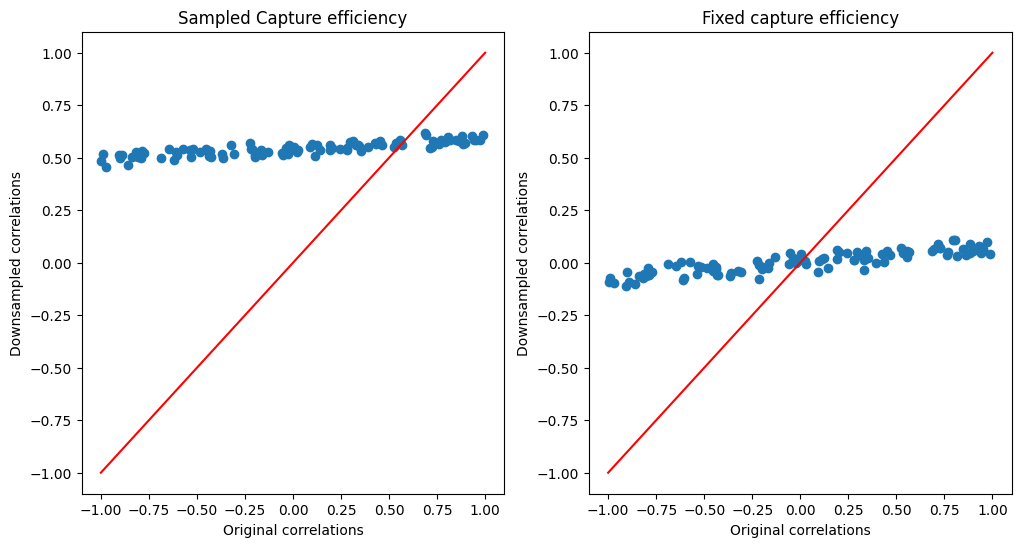

In [116]:
# repeats
M = 100

# size per MVN sample
n = 1000

# fixed capture efficiency
# beta_fixed = np.array([0.06 for j in range(n)])
beta_fixed = np.array([0.5 for j in range(n)])
# beta_fixed = np.array([0.45 if j % 2 else 0.55 for j in range(n)])

# sampled capture efficiency
#beta_sampled = rng.beta(1, 20, size=n)
#beta_sampled[beta_sampled < 0.01] = 0.01
beta_sampled = rng.uniform(0.4, 0.6, size=n)

# MVN mean
mu = np.array([100, 100])

# estimated original and downsampled correlation
original = []
downsampled_sampled = []
downsampled_fixed = []

# means
means_original_1 = []
means_original_2 = []
means_sampled_1 = []
means_sampled_2 = []
means_fixed_1 = []
means_fixed_2 = []

# for each repeat
for m in range(M):

    # random correlation
    corr = rng.uniform(-10, 10)
    rho = np.array(
        [[10, corr],
         [corr, 10]]
    )

    # sampled n MVN pairs
    values = rng.multivariate_normal(mean=mu, cov=rho, size=n)

    # separate pairs
    values_p1 = values[:, 0].astype(np.int64)
    values_p2 = values[:, 1].astype(np.int64)

    # store mean
    means_original_1.append(np.mean(values_p1))
    means_original_2.append(np.mean(values_p2))

    # estimate correlation
    test = scipy.stats.pearsonr(values_p1, values_p2)

    # store
    original.append(test.statistic)

    # downsample
    sampled_d1 = rng.binomial(values_p1, beta_sampled)
    sampled_d2 = rng.binomial(values_p2, beta_sampled)
    
    fixed_d1 = rng.binomial(values_p1, beta_fixed)
    fixed_d2 = rng.binomial(values_p2, beta_fixed)

    # store mean
    means_sampled_1.append(np.mean(sampled_d1))
    means_sampled_2.append(np.mean(sampled_d2))

    means_fixed_1.append(np.mean(fixed_d1))
    means_fixed_2.append(np.mean(fixed_d2))

    # estimate correlation
    test_sampled = scipy.stats.pearsonr(sampled_d1, sampled_d2)
    test_fixed = scipy.stats.spearmanr(fixed_d1, fixed_d2)

    # store
    downsampled_sampled.append(test_sampled.statistic)
    downsampled_fixed.append(test_fixed.statistic)

# plot correlation change
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(original, downsampled_sampled)
axs[0].set_xlabel("Original correlations")
axs[0].set_ylabel("Downsampled correlations")
axs[0].set_title("Sampled Capture efficiency")
axs[0].plot([-1, 1], [-1, 1], color="red")
axs[1].scatter(original, downsampled_fixed)
axs[1].set_xlabel("Original correlations")
axs[1].set_ylabel("Downsampled correlations")
axs[1].set_title("Fixed capture efficiency")
axs[1].plot([-1, 1], [-1, 1], color="red")
plt.show()

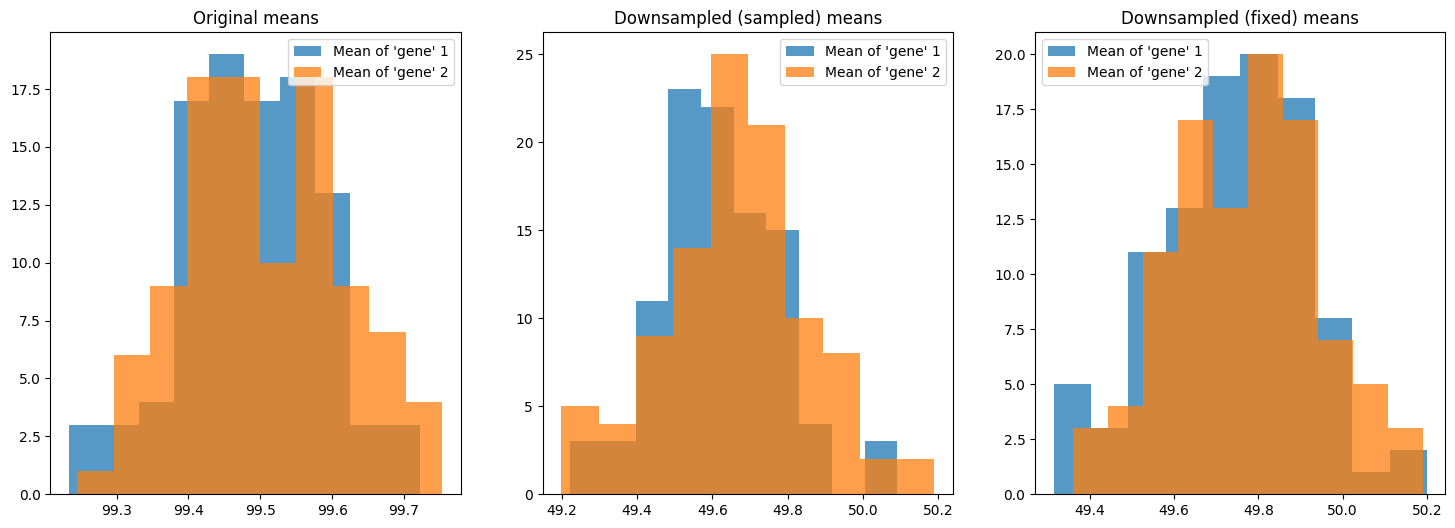

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].hist(means_original_1, label="Mean of 'gene' 1", alpha=0.75)
axs[0].hist(means_original_2, label="Mean of 'gene' 2", alpha=0.75)
axs[0].set_title("Original means")
axs[0].legend()
axs[1].hist(means_sampled_1, label="Mean of 'gene' 1", alpha=0.75)
axs[1].hist(means_sampled_2, label="Mean of 'gene' 2", alpha=0.75)
axs[1].set_title("Downsampled (sampled) means")
axs[1].legend()
axs[2].hist(means_fixed_1, label="Mean of 'gene' 1", alpha=0.75)
axs[2].hist(means_fixed_2, label="Mean of 'gene' 2", alpha=0.75)
axs[2].set_title("Downsampled (fixed) means")
axs[2].legend()
plt.show()